## Rough surfaces and statistics

According to our internship topic, we will finally develop a solver that can solve the evaluation of the contact between two rough viscoelastic surfaces. Now, in this week, we want to manage an algorithm that can generate rough surfaces. Let's still base on the first chapiter of Lucas(2020)[1].

First, we cite a figure from CMET course of Yastrebov[4] to clearify our work direction.

![Roughness_classification_according_to_Nayak](figures/Roughness_classification_according_to_Nayak.png)

### Synthesized rough surfaces

**White noise:**
$$
w\left(x_i, y_j\right), \quad\langle w\rangle=0, \quad\left\langle w^2\right\rangle=\Phi_0
$$

**Transform in Fourier space:**
$$
\hat{w}_{i j}=\hat{w}\left(k_x, k_y\right)=\sum_{i=0}^{N-1} \sum_{j=0}^{N-1} w\left(x_i, y_i\right) \exp \left[-\mathrm{i}\left(k_x x_i+k_y y_j\right)\right], \quad\left\langle\hat{w} \hat{w}^*\right\rangle=\left\langle w^2\right\rangle=\Phi_0
$$

**Create a filter**
$$
\hat{f}_{i j}=\hat{f}\left(k_x, k_y\right)=\left\{\begin{array}{l}
{\left[\frac{K_x^2+K_y^2}{k_l^2}\right]^{-(1+H) / 2}, \text { for } 1 \leq \frac{\sqrt{K_x^2+K_y^2}}{k_l} \leq \zeta,} \\
0, \text { elsewhere, }
\end{array}\right.
$$
where $K_x=(s+1) \pi / L-s k_x, K_y=(t+1) \pi / L-t k_y$ for $s, t \in\{-1,1\}, \zeta=k_s / k_l$

**Filter white noise:**
$$
\hat{z}_{i j}=\hat{z}\left(k_x, k_y\right)=\mathfrak{R}\left(\hat{f}_{i j}\right)\left[\mathfrak{R}\left(\hat{w}_{i j}\right)+\mathrm{i} \mathfrak{J}\left(\hat{w}_{i j}\right)\right]
$$

**Back to real space:**
$$
z\left(x_i, y_j\right)=\sum_{l=0}^{N-1} \sum_{m=0}^{N-1} \hat{z}_{l m} \exp \left[\mathrm{i} 2 \pi\left(l x_i+m y_j\right) / L\right]
$$

**Power spectral density:**
$$
\Phi\left(k_x, k_y\right)=\hat{z}\left(k_x, k_y\right) \hat{z}^*\left(k_x, k_y\right)=\hat{f}^2\left(k_x, k_y\right) \hat{w}^2\left(k_x, k_y\right)
$$

**Averaging over multiple samples:**
$$
\left\langle\Phi\left(k_x, k_y\right)\right\rangle=\left\langle\hat{w}^2\left(k_x, k_y\right)\right\rangle \hat{f}^2\left(k_x, k_y\right)=\left\{\begin{array}{l}
\Phi_0\left[\frac{\sqrt{K_x^2+K_y^2}}{k_l}\right]^{-2(1+H)}, \text { for } 1 \leq \frac{\sqrt{K_x^2+K_y^2}}{k_l} \leq \zeta \\
0, \text { elsewhere, }
\end{array}\right.
$$

**For isotropic surface:**
$$
\langle\Phi(K)\rangle= \begin{cases}\Phi_0\left(K / k_l\right)^{-2(1+H),} & \text { if } 1 \leq K / k_l \leq \zeta \\ 0, & \text { otherwise. }\end{cases}
$$

The equations above show a process to generate a rough surface. Let's understand step by step:

1. **Creating White Noise:** The process begins with the generation of white noise, providing a base layer of randomness. This is essential because the randomness mimics the inherent characteristics of natural rough surfaces.

2. **Fourier Transform to Frequency Space:** The white noise is then transformed into the frequency domain using the Fourier transform. This step allows for further manipulation and analysis in the frequency domain, facilitating the application of filters.

3. **Creating a Filter:** A filter is designed based on a specific Power Spectral Density (PSD) model, which dictates the contribution of different frequency components to the overall surface roughness. The purpose of the filter is to simulate the roughness characteristics observed in nature by controlling the contributions of these frequency components.

4. **Filtering White Noise:** The filter is applied to the Fourier-transformed white noise, resulting in a filtered representation in the frequency domain. This step effectively adjusts the contributions of different frequency components to produce a surface with the desired roughness characteristics.

5. **Inverse Fourier Transform Back to Real Space:** The filtered frequency domain data is then converted back into the spatial domain through an inverse Fourier transform, yielding the rough surface. This step transforms the simulated rough surface from the frequency domain back into its spatial representation.

6. **Calculating Power Spectral Density and Averaging Over Multiple Samples:** By calculating the power spectral density of the filtered data and averaging over multiple samples, the final surface's statistical characteristics can be obtained. This helps assess whether the synthesized surface's roughness matches the expected model.

In summary, the synthesis of rough surfaces utilizing white noise and specific PSD models allows for the precise control of surface roughness characteristics. 

### Here in our case, we focus on isotropic surface[1], $\phi(\boldsymbol{q}) \sim q^{-\tau}$, $\tau$ can be expressed in terms of the Hurst exponent as $\tau=2(H+1)$

$$
\phi(\boldsymbol{q}):=|\mathcal{F}[h](\boldsymbol{q})|^2
$$



$$
\phi(\boldsymbol{q})= \begin{cases}C & q_l \leq q<q_r, \\ C\left(\frac{q}{q_r}\right)^{-2(H+1)} & q_r \leq q<q_s, \\ 0 & \text { otherwise, }\end{cases}
$$

And we are expecting to plot this function as below:

![PSD_vs_wavenumber](figures/phi_vs_wavenumber.png)

where $k$ represents wavenumber, here in our case, we apply $q$

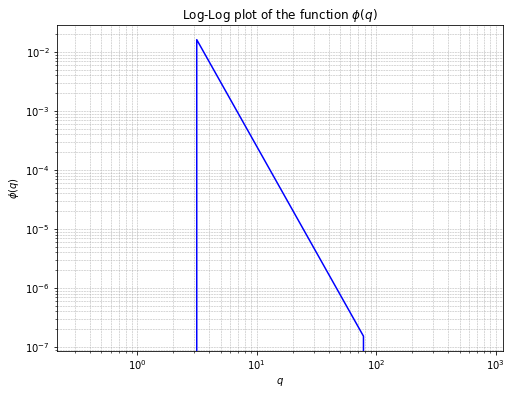

In [3]:
import numpy as np
import matplotlib.pyplot as plt

L = 2

# Constants for the piecewise function
C = 1 # Just as an example, C can be any constant
q_l = 2*np.pi/L
q_r = 2*np.pi/L
q_s = 2*np.pi*25/L
H = 0.8 # Hurst exponent, just as an example

# Defining the piecewise function
def phi(q):
    if q_l <= q < q_r:
        return C
    elif q_r <= q < q_s:
        return C * q ** (-2 * (H + 1))
    else:
        return 0

# Generating a range of q values for the plot
q_values = q_values = np.logspace(np.log10(q_l/10), np.log10(q_s*10), 500)#just as an example, we will overload the range of q values later
phi_values = np.array([phi(q) for q in q_values])

# Creating the plot
plt.figure(figsize=(8, 6))
plt.loglog(q_values, phi_values, label=r'$\phi(q)$', color='blue')

# Adding titles and labels
plt.title('Log-Log plot of the function $\\phi(q)$')
plt.xlabel('$q$')
plt.ylabel('$\\phi(q)$')

# Adding a grid
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


### Algorithm 1: Filtering algorithm (Hu and Tonder, 1992)

This method is based on digital signal processing techniques. **The core idea is to use a filter to modify the spectral content of a surface profile, thereby generating roughness characteristics that resemble those of a real surface.** It often involves starting with a base surface and then applying a series of filters to introduce or amplify certain features, mimicking the statistical properties of roughness observed in real-world surfaces.



**Inputs:** surface sizes $ \widehat{N} := (N_1, N_2) $, PSD $ \phi : \mathbb{R}^2 \rightarrow \mathbb{R} $.

1. Initialize $ \mathbf{X} $ as a Gaussian uncorrelated vector:
   $$ \mathbf{X} \sim \mathcal{N}(0, I) $$
2. Define $ \mathbf{S} $ with the discrete PSD for each $ \mathbf{k} $ in $ \mathbb{Z}^2_{\widehat{N}} $:
   $$ \mathbf{S} \leftarrow \phi(\mathbf{k}) $$
3. Compute the Fourier transform of $ \mathbf{X} $:
   $$ \mathbf{\hat{H}} \leftarrow \text{FFT}[\mathbf{X}] $$
4. Perform a point-wise product and take the square root:
   $$ \mathbf{\hat{H}} \leftarrow \mathbf{\hat{H}} \circ \sqrt{\mathbf{S}} $$
5. Obtain the discrete surface heights $ \mathbf{H} $ by inverse FFT:
   $$ \mathbf{H} \leftarrow \sqrt{|\widehat{N}|} \cdot \text{FFT}^{-1}[\mathbf{\hat{H}}] $$

**Output:** $ \mathbf{H} $ discrete surface heights.



In [4]:


#We generate a 2D coordinate space
n = 30
m = 30

#we define the frequency with q_x and q_y
q_x = 2 * np.pi * np.fft.fftfreq(n, d=L/n)
q_y = 2 * np.pi * np.fft.fftfreq(m, d=L/m)
#QX, QY = np.meshgrid(q_x, q_y)

phi_values = np.sqrt(q_x**2 + q_y**2)

gen = np.random.default_rng()
theta = gen.uniform(0, 2*np.pi, size=phi_values.shape)




# Calculate the amplitude spectrum from PSD
amplitude_spectrum = np.sqrt(power_spectrum)

# Apply the PSD and random phases to the white noise field
grf_fourier = amplitude_spectrum * np.exp(1j * theta)


NameError: name 'power_spectrum' is not defined


### Algorithm 2: Random phase algorithm (Wu, 2000)

This approach focuses on generating surface topography by manipulating the phase information in the frequency domain. **The random phase algorithm constructs the surface by ensuring that the amplitude spectrum meets the desired roughness criteria, but with phases randomly distributed.** This randomness in phase ensures the surface exhibits the stochastic nature of real-world roughness, allowing for the generation of surfaces with specific statistical properties but without a predefined spatial pattern.


**Inputs:** surface sizes $ \widehat{N} := (N_1, N_2) $, PSD $ \phi : \mathbb{R}^2 \rightarrow \mathbb{R} $.

1. Initialize $ \mathbf{X} $ with uniformly distributed phases:
   $$ \mathbf{X} \leftarrow \mathcal{U}(-\pi, \pi) $$
2. Define $ \mathbf{S} $ with the discrete PSD for each $ \mathbf{k} $ in $ \mathbb{Z}^2_{\widehat{N}} $:
   $$ \mathbf{S} \leftarrow \phi(\mathbf{k}) $$
3. Compute the exponential of $ \mathbf{X} $ times $ i $ (the imaginary unit):
   $$ \mathbf{\hat{H}} \leftarrow \exp(\mathbf{X}i) $$
4. Perform a point-wise product and take the square root:
   $$ \mathbf{\hat{H}} \leftarrow \mathbf{\hat{H}} \circ \sqrt{\mathbf{S}} $$
5. Obtain the discrete surface heights $ \mathbf{H} $ by inverse FFT:
   $$ \mathbf{H} \leftarrow |\widehat{N}| \cdot \text{FFT}^{-1}[\mathbf{\hat{H}}] $$

**Output:** $ \mathbf{H} $ discrete surface heights.




Each of these algorithms has its advantages and applications, depending on the required level of detail, computational efficiency, and the specific characteristics of the rough surface to be modeled. The Filtering algorithm is particularly useful for applications where the roughness spectrum of the surface is well understood and needs to be replicated accurately. **On the other hand, the Random Phase algorithm is more suited for cases where the statistical properties of the surface are known, but the exact spatial arrangement of the roughness features is not critical, allowing for a more stochastic approach to surface generation.**



Reference:

[1] Frérot, Lucas Henri Galilée. ‘Bridging Scales in Wear Modeling with Volume Integral Methods for Elastic-Plastic Contact’, n.d.

[2] Hu, Y.Z. and Tonder, K., 1992. Simulation of 3-D random rough surface by 2-D digital filter and Fourier analysis. International journal of machine tools and manufacture, 32(1-2), pp.83-90. DOI: 10.1016/0890-6955(92)90064-N

[3] Nayak, J. Lub. Tech. (ASME) 93:398 (1971)

[4] Vladislav A. Yastrebov, Contact mechanics and elements of tribology, Lecture 4.b, Contact and transport at small scales, Open Course Contact Mechanics and Elements of Tribology, January 23, 2024, https://cmet.yastrebov.fr/index.html

[5] https://github.com/vyastreb/SelfAffineSurfaceGenerator